<a href="https://colab.research.google.com/github/CorrAUDJPY/ML/blob/main/Unsupervised_Classification_Hierarchical_Kmeans_fifa_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIFA 18: Normalize data
The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# Load the Census dataset
project_folder='/content/drive/My Drive/Colab Notebooks/Data Camp-Clustering/'
fifa = pd.read_csv(project_folder+'fifa_18_sample_data.csv')

# Success - Display the first record
fifa.head(1)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
fifa.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a Pandas dataframe, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded

Instructions
- Scale the values of eur_wage and eur_value using the whiten() function.
-Plot the scaled wages and transfer values of players using the .plot() method of Pandas

In [ ]:
from  scipy.cluster.hierarchy import linkage,fcluster,dendrogram
from scipy.cluster.vq import whiten

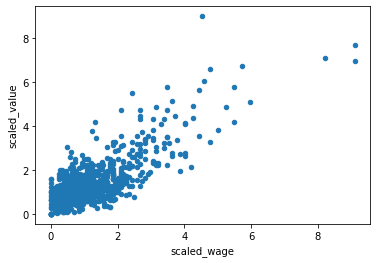

In [ ]:
fifa['scaled_wage']=whiten(fifa['eur_wage'])
fifa['scaled_value']=whiten(fifa['eur_value'])
fifa.plot( 'scaled_wage' , 'scaled_value' , kind='scatter' )
plt.show()


**FIFA 18: exploring defenders**
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

***sliding tackle:*** a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
***aggression***: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

**This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.**

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a Pandas dataframe, fifa.

Instructions 1/4

1. Fit the scaled data in columns scaled_sliding_tackle and scaled_aggression into a hierarchical clustering algorithm. 
2. Additionally, you may want to check how long it takes to run the data in the console using the timeit module.

In [ ]:
# Fit the data into a hierarchical clustering algorithm
fifa['scaled_sliding_tackle']=whiten(fifa['sliding_tackle'])
fifa['scaled_aggression']=whiten(fifa['aggression'])

distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

Assign cluster labels to each row in the data using the fcluster() function (use 3 clusters).


In [ ]:
# Assign cluster labels to each row of data
fifa['cluster_labels']=fcluster(distance_matrix,3,criterion='maxclust')


Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.


In [ ]:
# Display cluster centers of each cluster
fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean()

,scaled_sliding_tackle,scaled_aggression
cluster_labels,,
1,2.837810,4.280968
2,0.579966,1.766698
3,1.166930,3.415214


Create a scatter plot using seaborn with the scaled_sliding_tackle attribute on the x-axis and the scaled_aggression attribute on the y-axis. Assign a different color to each cluster.


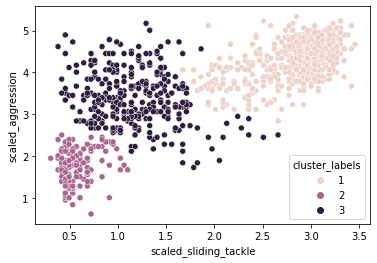

In [ ]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle' , y='scaled_aggression', hue='cluster_labels', data=fifa)


***FIFA 18: defenders revisited***.  
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

defending: a number which signifies the defending attributes of a player.  
physical: a number which signifies the physical attributes of a player.   
These are typically defense-minded players.    
In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: 
  - kmeans, vq from scipy.cluster.vq, 
  - matplotlib.pyplot as plt, 
  -  seaborn as sns. 
  
The data for this exercise is stored in a Pandas dataframe, fifa. The scaled variables are scaled_def and scaled_phy.

1. Initialize the random seed to the list [1000,2000].
2. Fit the scaled data in columns scaled_def and scaled_phy into a k-means clustering algorithm with 3 clusters and assign cluster labels.

In [ ]:
from scipy.cluster.vq import  kmeans, vq 
import random

In [ ]:
# Set up a random seed in numpy
random.seed([1000,2000])



In [ ]:
# normalize data
fifa[ ['scaled_def', 'scaled_phy'] ] =whiten(fifa[ ['def', 'phy'] ] )

# Fit the data into a k-means algorithm
cluster_centers, _ = kmeans( fifa[ ['scaled_def', 'scaled_phy'] ] , 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq( fifa[ ['scaled_def', 'scaled_phy'] ] , cluster_centers  )


Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

In [ ]:
fifa.head(2)

print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


Create a seaborn scatter plot with scaled_def on the x-axis and scaled_phy on the y-axis, with each cluster represented by a different color.


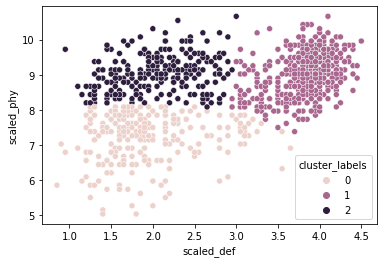

In [ ]:
# Create a scatter plot through seaborn
# Create a scatter plot through seaborn
sns.scatterplot(x=fifa['scaled_def'], y=fifa['scaled_phy'], hue=fifa['cluster_labels'], data=fifa)
plt.show()


FIFA 18: what makes a complete player?
The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, fifa. features is the list of these column names and scaled_features is the list of columns which contains their scaled values. The following have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns.

Before you start the exercise, you may wish to explore scaled_features in the console to check out the list of six scaled columns names.

In [ ]:
features=['pac', 'sho', 'pas', 'dri', 'def', 'phy']
scaled_features=['scaled_'+ feature for feature in features]
fifa[scaled_features]=whiten(fifa[features])

# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans( fifa[scaled_features] , 2 )

Assign cluster labels to each row using vq() and print cluster centers of scaled_features using the .mean() method of Pandas.

In [ ]:
fifa['cluster_labels'], _ = vq( fifa[scaled_features] , cluster_centers)
fifa.groupby('cluster_labels')[scaled_features].mean()


,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
cluster_labels,,,,,,
0,6.684385,5.427481,8.455351,8.513096,2.504167,8.336310
1,5.444516,3.664623,7.165875,6.759972,3.967897,9.210371


Plot a bar chart of scaled attributes of each cluster center using the .plot() method of Pandas.

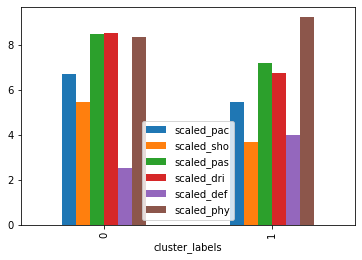

In [ ]:
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True,kind='bar')
plt.show()


Print the names of first 5 players in each cluster, using the name column.


In [ ]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
  print( fifa[ fifa['cluster_labels'] ==cluster]['name'].values[: 15] ) 


['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer'
 'R. Lewandowski' 'De Gea' 'E. Hazard' 'T. Kroos' 'G. Higuaín'
 'K. De Bruyne' 'T. Courtois' 'A. Sánchez' 'L. Modrić' 'G. Bale']
['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín'
 'M. Hummels' 'Thiago Silva' 'Piqué' 'Sergio Busquets' 'T. Alderweireld'
 'David Luiz' 'Javi Martínez' 'Sokratis' 'Miranda' 'Pepe']
